###DemLin02:
#Ill-conditioning of Vandermonde matrix
* todo: Review this demo, result not the same as in Miranda's



In [1]:
import numpy as np
from numpy.linalg import norm, cond, solve
import time
import matplotlib.pyplot as plt
%matplotlib notebook
np.set_printoptions(precision=4)

Compute approximation error and matrix condition number

In [6]:
n = np.arange(6, 51)
nn = n.size

errv = np.zeros(nn)
conv = np.zeros(nn)

for i in range(nn):
    v = np.vander(1 + np.arange(n[i]))
    errv[i] = np.log10(norm(np.identity(n[i]) - solve(v, v)))
    conv[i] = np.log10(cond(v))

print('errv =\n', errv)

errv =
 [-11.0688 -14.6779 -12.5801  -6.8825  -5.5384  -5.9532  -7.6494  -5.9833
  -5.6239  -6.3194  -5.651   -5.8029  -4.5616  -5.6639  -4.912   -5.0873
  -4.958   -5.8492  -5.0541  -5.6499  -5.7562  -5.6496  -5.8851  -5.7686
  -5.475   -5.3383  -5.4446  -5.0718  -5.4484  -5.3056  -5.3707  -5.7315
  -5.7709  -6.0165  -5.7509  -5.0538  -5.838   -6.063   -6.0756  -2.9206
  -5.0652  -5.759   -5.8286  -6.3859  -6.0894]


Smooth using quadratic function

In [7]:
X = np.vstack([np.ones(nn), n]).T
b = np.linalg.lstsq(X, errv)[0]
errv = np.dot(X, b)
print('b = ', b)


b = np.linalg.lstsq(X, conv)[0]
conv = np.dot(X, b)
print('b = ', b)

b =  [-8.003   0.0681]
b =  [1.0590e+01 9.1579e-03]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  import sys


Plot matrix condition numbers

Text(0.5,1,'Vandermonde Matrix Condition Numbers')

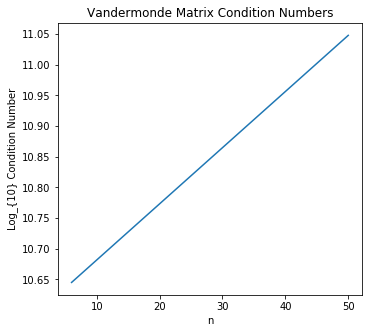

In [4]:
plt.figure(figsize=[12, 5])
plt.subplot(1, 2, 1)
plt.plot(n, conv)
plt.xlabel('n')
plt.ylabel('Log_{10} Condition Number')
plt.title('Vandermonde Matrix Condition Numbers')